In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import hydropy as hp

from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor

QStations =  pd.read_csv('q29067050.csv',index_col=0,parse_dates=True)
print(QStations.to_string())

              29067050  29067160_predict2
FECHA                                    
1991-01-01         NaN           4.150000
1991-01-02         NaN           4.150000
1991-01-03         NaN           4.150000
1991-01-04         NaN           7.040000
1991-01-05         NaN           6.560000
1991-01-06         NaN           5.750000
1991-01-07         NaN           6.740000
1991-01-08         NaN           6.650000
1991-01-09         NaN           6.470000
1991-01-10         NaN           6.110000
1991-01-11         NaN           5.750000
1991-01-12         NaN           5.750000
1991-01-13         NaN           8.520000
1991-01-14         NaN           7.860000
1991-01-15         NaN           6.650000
1991-01-16         NaN           6.470000
1991-01-17         NaN           6.740000
1991-01-18         NaN           7.190000
1991-01-19         NaN           7.190000
1991-01-20         NaN           7.840000
1991-01-21         NaN           8.330000
1991-01-22         NaN           8

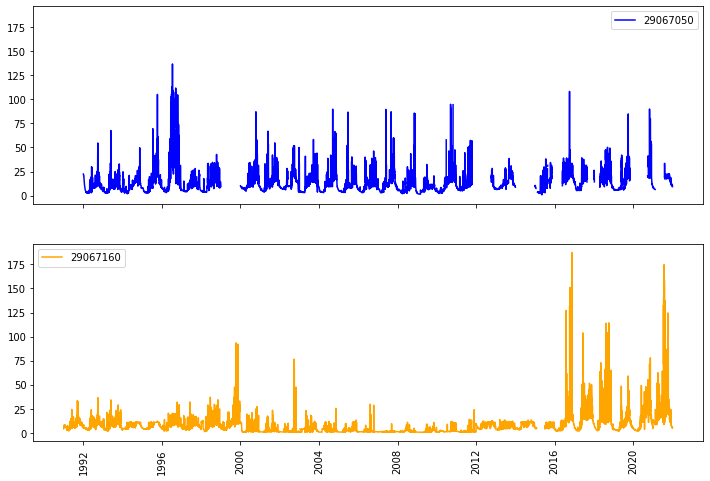

In [2]:
fig, axs=plt.subplots(2,1,figsize=(12,8),sharex=True,sharey=True)
axs[0].plot(QStations.index,QStations['29067050'],label='29067050',color='blue')
axs[0].legend()
axs[1].plot(QStations.index,QStations['29067160_predict2'],label='29067160',color='orange')
axs[1].legend()
plt.xticks(rotation='vertical')
plt.show()

In [3]:
QNotNan = QStations.dropna()
QNotNan

,29067050,29067160_predict2
FECHA,,
1992-01-01,22.370000,5.84000
1992-01-02,22.150000,5.93000
1992-01-03,22.150000,8.44000
1992-01-04,21.480000,7.38000
1992-01-05,21.250000,7.92000
...,...,...
2021-12-27,10.692031,5.24000
2021-12-28,10.359307,5.41875
2021-12-29,10.823384,5.06125


In [4]:
xTrain = QNotNan[['29067160_predict2']]
yTrain = QNotNan[['29067050']].values.flatten()

In [5]:
print(xTrain[:])
print(yTrain[:])

            29067160_predict2
FECHA                        
1992-01-01            5.84000
1992-01-02            5.93000
1992-01-03            8.44000
1992-01-04            7.38000
1992-01-05            7.92000
...                       ...
2021-12-27            5.24000
2021-12-28            5.41875
2021-12-29            5.06125
2021-12-30            5.02000
2021-12-31            5.19875

[8571 rows x 1 columns]
[22.37       22.15       22.15       ... 10.8233836   9.90615279
  9.29090287]


In [6]:
scaler = StandardScaler().fit(xTrain.values)
xTrainScaled = scaler.transform(xTrain.values)

In [7]:
print(xTrainScaled[:])

[[-0.07678085]
 [-0.06719392]
 [ 0.20017507]
 ...
 [-0.15973448]
 [-0.16412849]
 [-0.14508777]]


In [8]:
#check scaler
print(xTrainScaled.mean(axis=0))
print(xTrainScaled.std(axis=0))

[9.28488933e-17]
[1.]


In [9]:
#regressor
regr = MLPRegressor(random_state=1, max_iter=10000).fit(xTrainScaled, yTrain)

In [10]:
#test
xTest = QStations[['29067050']].dropna()
xTestScaled = scaler.transform(xTest.values)

In [11]:
print(xTest.describe())
print(xTestScaled[:])

          29067050
count  8751.000000
mean     13.381770
std      12.566594
min       0.752000
25%       6.240205
50%       9.960000
75%      16.440000
max     136.800000
[[1.68401971]
 [1.66058498]
 [1.66058498]
 ...
 [0.4540567 ]
 [0.35635188]
 [0.29081453]]


In [12]:
#regression
yPredict = regr.predict(xTestScaled)
print(yPredict[:])

[25.64952788 25.63609497 25.63609497 ... 18.37490453 17.48491609
 16.8879395 ]


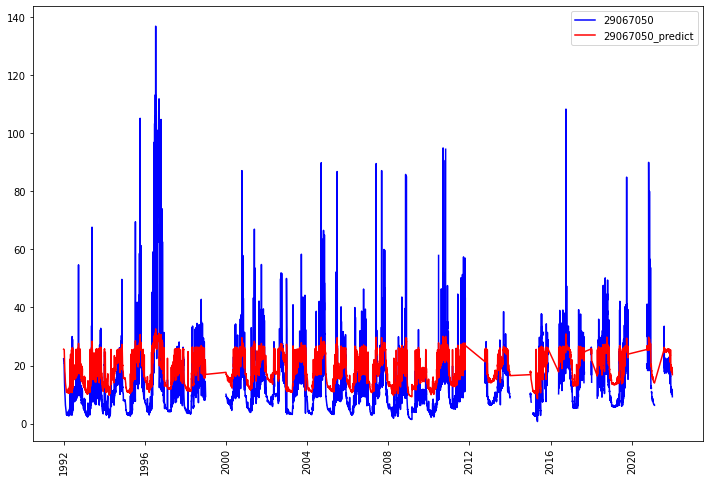

In [13]:
#comparison of station
fig, ax=plt.subplots(figsize=(12,8),sharex=True,sharey=True)
ax.plot(QStations.index,QStations['29067050'],label='29067050', color='blue')
ax.plot(xTest.index,yPredict,label='29067050_predict', color= 'red')
plt.legend()
plt.xticks(rotation='vertical')
plt.show()

In [15]:
#fill the new column with orginal and predicted values for Est
for index, row in QStations.iterrows():
    if np.isnan(row['29067050']) and ~np.isnan(row['29067160_predict2']):
        rowScaled = scaler.transform([[row['29067160_predict2']]])
        QStations.loc[index,['29067050_predict2']] = regr.predict(rowScaled)
    elif ~np.isnan(row['29067050']):
         QStations.loc[index,['29067050_predict2']] = row['29067050']
    else:
         row['29067050_predict2'] = np.nan

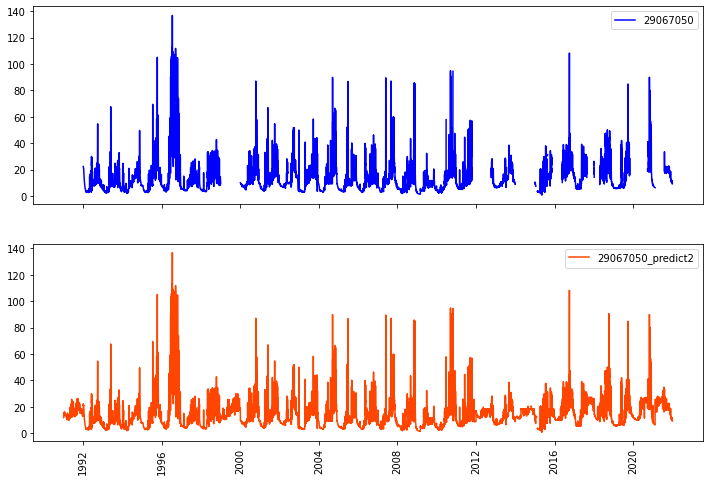

In [17]:
#show original and filled values
fig, axs=plt.subplots(2,1,figsize=(12,8),sharex=True,sharey=True)
axs[0].plot(QStations.index,QStations['29067050'],label='29067050',color='blue')
axs[0].legend()
axs[1].plot(QStations.index,QStations['29067050_predict2'],label='29067050_predict2',color='orangered')
axs[1].legend()
plt.xticks(rotation='vertical')
plt.show()

In [18]:
#insert predicted values
print(QStations.to_string())

              29067050  29067160_predict2  29067050_predict2
FECHA                                                       
1991-01-01         NaN           4.150000          11.899725
1991-01-02         NaN           4.150000          11.899725
1991-01-03         NaN           4.150000          11.899725
1991-01-04         NaN           7.040000          14.703890
1991-01-05         NaN           6.560000          14.238146
1991-01-06         NaN           5.750000          13.452204
1991-01-07         NaN           6.740000          14.412800
1991-01-08         NaN           6.650000          14.325473
1991-01-09         NaN           6.470000          14.150819
1991-01-10         NaN           6.110000          13.801512
1991-01-11         NaN           5.750000          13.452204
1991-01-12         NaN           5.750000          13.452204
1991-01-13         NaN           8.520000          16.139933
1991-01-14         NaN           7.860000          15.499535
1991-01-15         NaN  

In [19]:
myflowserie = hp.HydroAnalysis(QStations)

Not able to interpret the time serie frequency,                      run the frequency_change to define the frequency!


In [20]:
# Data inspection
myflowserie.summary() #head(), tail(),

,29067050,29067160_predict2,29067050_predict2
count,8751.000000,11071.000000,11251.000000
mean,13.381770,7.478894,14.031935
std,12.566594,10.444299,11.428245
min,0.752000,0.505000,0.752000
25%,6.240205,1.644000,7.286221
50%,9.960000,4.610000,11.680000
75%,16.440000,9.873438,17.750000
max,136.800000,187.259375,136.800000


In [22]:
#descargar datos
ruta ="29067050_completed.csv"

In [23]:
QStations.to_csv(ruta)